In [205]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import datetime as datetime

In [206]:
### PART 1 ###
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [207]:
logins['Count'] = 1
logins.head()

,login_time,Count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [208]:
logins['login_time'] = pd.to_datetime(logins['login_time']) # convert to datetime object

In [209]:
type(logins['login_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [210]:
logins = logins.set_index('login_time') # set datetime to index

In [211]:
logins.head()

,Count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [212]:
login_15 = logins.resample('15min').sum() # aggregate logins in 15 min intervals

In [213]:
login_15.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Text(0.5, 0, 'Time Interval')

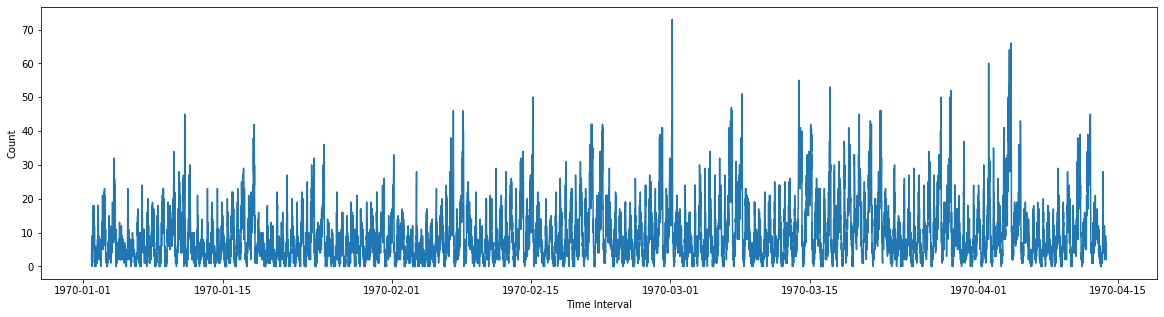

In [214]:
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(login_15)
ax.set_ylabel('Count')
ax.set_xlabel('Time Interval')

In [215]:
logins1 = login_15
logins1['Time'], logins1['Date'] = login_15.index.to_series().apply(lambda x: x.time()), login_15.index.to_series().apply(lambda x: x.date())

In [216]:
logins1.head()

,Count,Time,Date
login_time,,,
1970-01-01 20:00:00,2,20:00:00,1970-01-01
1970-01-01 20:15:00,6,20:15:00,1970-01-01
1970-01-01 20:30:00,9,20:30:00,1970-01-01
1970-01-01 20:45:00,7,20:45:00,1970-01-01
1970-01-01 21:00:00,1,21:00:00,1970-01-01


Text(0.5, 1.0, 'Date vs Time')

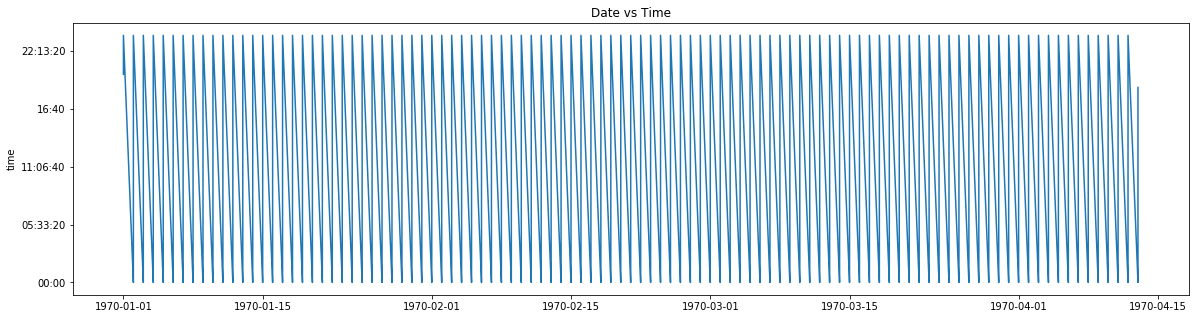

In [217]:
# Plot date against time 
fig, ax = plt.subplots(figsize=(20,5))
ax.plot('Date', 'Time', data=logins1)
ax.set_title('Date vs Time')

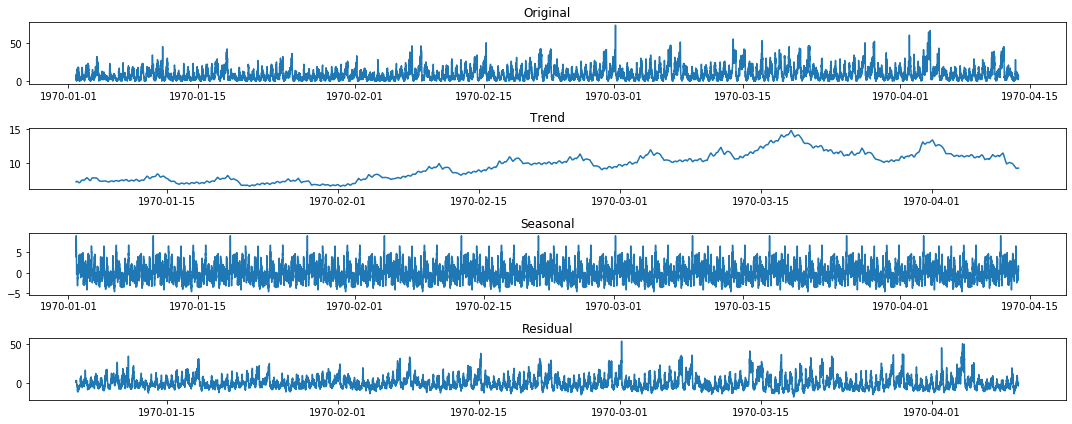

In [218]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(login_15['Count'], freq=800) 

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original data, the trend, the seasonality, and the residuals 
fig, ax = plt.subplots(figsize=(15,6))

plt.subplot(411)
plt.plot(login_15['Count'], label = 'original')
plt.title('Original')

plt.subplot(412)
plt.plot(trend, label = 'trend')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label = 'seasonality')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(residual, label = 'residuals')
plt.title('Residual')
plt.tight_layout()

In [219]:
### PART 2 ###
# 1. A measure of success for this experiment could involve an increase in cars crossing the bridge, specifically--
# in the daytime, if more cars enter the toll bridge coming from Gotham, and in the night--from Metropolis, then
# we may consider this experiment a success. Such a metric would be easy to measure, and only requires the likely
# assumption, the toll booths possess some way of counting bridge traffic.

# 2. We could perform two hyptothesis tests as described below: 
# H0: There is no difference in the average number of cars entering the bridge from <Gotham/Metropolis> during the week, four weeks following toll changes.
# H1: There is an increase in the average number of cars entering the bridge from <Gotham/Metropolis> during the week, four weeks following toll changes.
# We shall use a z test, given the assumed size of the data. 
# p > 0.05 for both tests: fail to reject null; recommend alternative experiment
# p < 0.05 for both tests: reject null; recommend toll reimbursement
# else: inconclusive: recommend alternative experiment

In [220]:
### PART 3 ###
# 1
# pd.read_json doesn't work
import json
with open('ultimate_data_challenge.json') as f:
  data = json.load(f)
data[0] # list of dicts

{'city': "King's Landing",
 'trips_in_first_30_days': 4,
 'signup_date': '2014-01-25',
 'avg_rating_of_driver': 4.7,
 'avg_surge': 1.1,
 'last_trip_date': '2014-06-17',
 'phone': 'iPhone',
 'surge_pct': 15.4,
 'ultimate_black_user': True,
 'weekday_pct': 46.2,
 'avg_dist': 3.67,
 'avg_rating_by_driver': 5.0}

In [221]:
df = pd.DataFrame(data) # convert to dataframe
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [222]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [223]:
df.dropna(inplace=True)
df.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null datetime64[ns]
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB


In [225]:
df.describe() # mean pct of trips occurring on weekdays ~ 60%

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


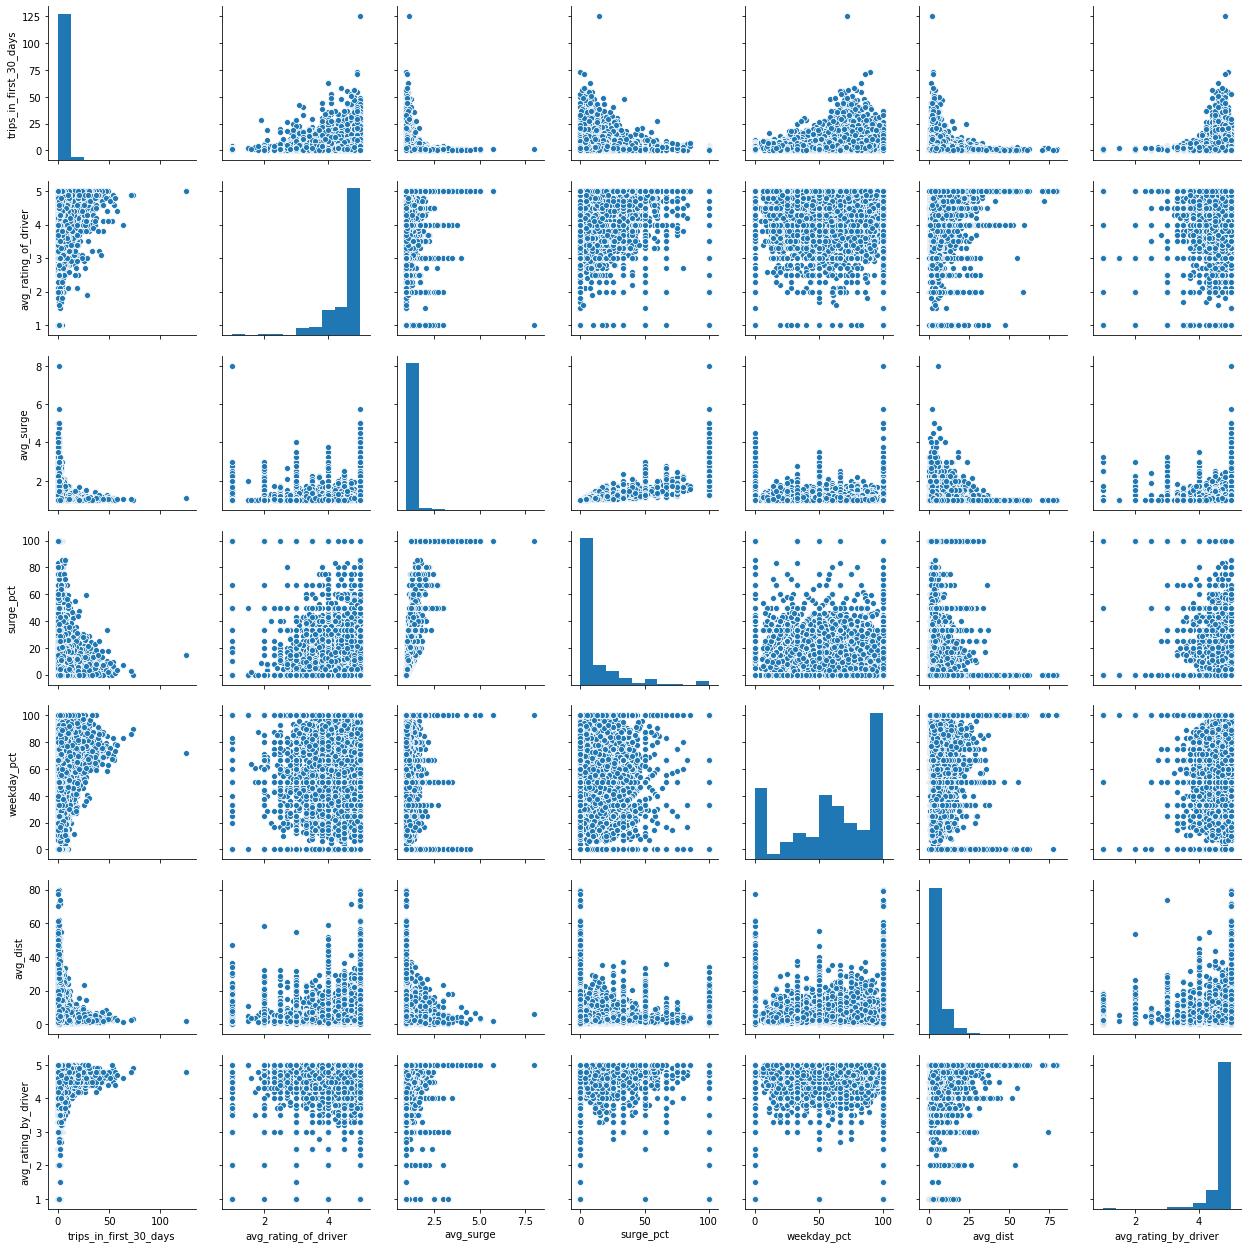

In [226]:
import seaborn as sns
sns.pairplot(df.drop(columns=['ultimate_black_user']))

In [227]:
# look at user retention 
# user considered retained if trip taken in last 30 days before data was pulled
current = df['last_trip_date'].max() # data pulled '2014-07-01 00:00:00'
one_month_prev = current - datetime.timedelta(days=30) # 30 days ago
one_month_prev

Timestamp('2014-06-01 00:00:00')

In [228]:
# create 'active?_1mo' column (1=yes, 0=no)
active = []
for date in df['last_trip_date']:
    if date >= one_month_prev:
        active.append(1)
    else:
        active.append(0)

df['active?_1mo'] = active

In [229]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active?_1mo
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [230]:
df['active?_1mo'].sum() / df.shape[0] # user retention rate

0.41102666184099407

In [285]:
# 2
# create numerical columns for length of time since signup AND length of time since last trip
df['days_since_signup'] = np.abs(df['signup_date'] - current).dt.days
df['days_since_last_trip'] = np.abs(df['last_trip_date'] - current).dt.days

In [288]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active?_1mo,days_since_signup,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,157,14
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,153,57
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,176,175
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,172,2
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,155,108


In [289]:
df_numerical = pd.get_dummies(df)
df_numerical.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active?_1mo,days_since_signup,days_since_last_trip,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,157,14,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,153,57,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,176,175,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,172,2,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,155,108,0,0,1,1,0


In [294]:
from sklearn.model_selection import train_test_split

X = df_numerical.drop(columns=['active?_1mo', 'signup_date', 'last_trip_date', 'days_since_last_trip'])
y = df_numerical['active?_1mo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [298]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
model = rf.fit(X_train, y_train)
y_pred = model.predict(X_test)

/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [304]:
# performance
from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
print('f1: ', f1_score(y_test, y_pred, average='weighted'))

from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf, X_test, y_test, cv=10)
print('cross val score mean: ', cvs.mean())

accuracy:  0.7478687469840759
f1:  0.7443757900195056
cross val score mean:  0.7403899442217395


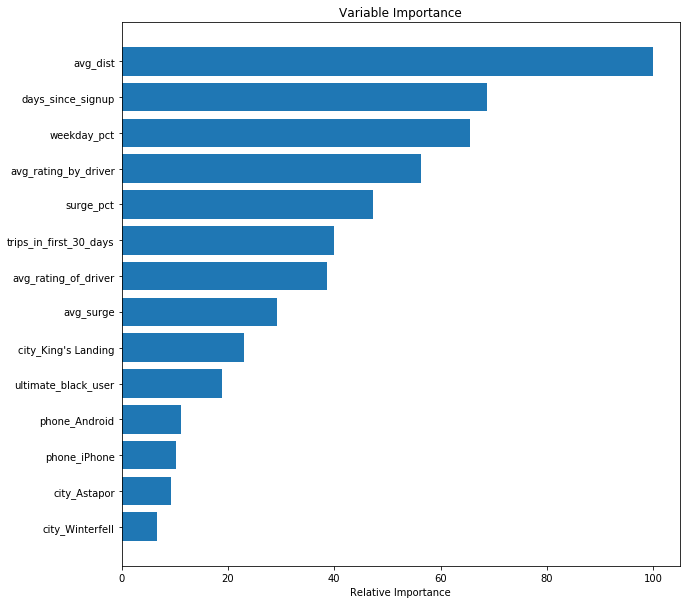

In [297]:
feature_importance = rf.feature_importances_
# importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:20]
sorted_idx = np.argsort(feature_importance)[:20]

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size

plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
# We were able to generate a random forests classifier model with approximately 75% accuracy. It appears the 
# most important features in determining user activity after 6 months was 'avg_dist', or average distance traveled, 
# followed by 'weekday_pct', or percent of trips occurring on weekdays.